# The First Part of the Assignment of IDS 2019-2020
Document your results as well as the way you obtained them in this jupyter notebook. A seperate report (pdf, word etc.) is _not_ required. However, it is necessary that you provide the python code leading to your results as well as textual answers to the assignment questions in this notebook. *DO NOT CLEAR THE OUTPUT of the notebook your are submitting!* In the cases that the result of an algorithm is pdf, jpg, etc, you should attach the result to this notebook file and refer to that in the text.  

Next to the jupyter notebook, submit one zip-file containing all data sets that you are asked to submit. Make sure they are easily identifiable, i.e. use names as requested in the corresponding question.

Do not change the general structure of this notebook, but you can add further markdown or code cells to explain your solutions if necessary. In the end, submit this file and your created data sets in moodle.

Only <font color="red">one </font> group member should upload your group's solution. *Make sure to include group members' names and matriculation numbers*. If your name and student id are not included in the report, you will not receive any points!


Hint 1: While answering the questions, you will get a better and better impression of the given data. However, feel free to compute additional results and vizualizations to motivate the decisions you need to make, for example with respect to modification, simplification or sampling of the data. <font color="red"><b>Ensure that all claims you make are supported by the presented facts!</b></font>

Hint 2: <font color="red"><b>Some of the tasks might need some time to run. Take this into account in your planning.</b></font>

Hint 3: RWTHonline allows for multiple submissions (each submission overwrites the previous ones). <font color="red"><b>Partial submissions are possible and encouraged. </b></font> This helps in case of technical problems of RWTHonline, which do seldomly happen.

<font color="red"><b>Student Names and IDs:
    1. Shrey Gulati       - 389902
    2. Yuchen Tao         - 389901
    3. Muhammad Sajid Ali - 391708

## Preprocessing of the Dataset (5 points)
 You should carry out some preprocessing steps before starting the analysis:
 - Select 90% of 'population_density' dataset by random sampling.
     - Use one of the group member's student number as a seed.
 - Add another column to the dataset:
     - Name it 'population_density_categorical'.
     - The values in this column depend on values in 'population_density' column and will be defined as follows:
        - 5824=<population density              corresponding value in 'population_density_categorical' column: 'very high'
        - 4368=<population density<5824         corresponding value in 'population_density_categorical' column: 'high'
        - 2912=<population density<4368         corresponding value in 'population_density_categorical' column: 'medium'
        - 1456=<population density<2912         corresponding value in 'population_density_categorical' column: 'low' 
        - population density<1456               corresponding value in 'population_density_categorical' column: 'very low'
 - After completing this preprocessing step, export your final dataset as 'population_density_categorical.csv' dataset and use that for next steps of the assignment.
 - If it is not directly mentioned, you should always use your extracted (above-created) dataset (without any cleaning).
 - <font color='red'>Important!</font> Make sure that you submit your extracted dataset with your result in moodle.

In [2]:
import pandas as pd
dataf = pd.read_csv('population_density.csv', sep=',', parse_dates=['date_time'])
print(dataf[:5]) #printing sample data to see if data is fected correctly


  holiday  temperature  rain_1h  snow_1h  clouds_percentage weather_type  \
0    None       288.28      0.0      0.0                 40       Clouds   
1    None       289.36      0.0      0.0                 75       Clouds   
2    None       289.58      0.0      0.0                 90       Clouds   
3    None       290.13      0.0      0.0                 90       Clouds   
4    None       291.14      0.0      0.0                 75       Clouds   

  weather_type_details           date_time  population_density  
0     scattered clouds 2012-10-02 09:00:00                5545  
1        broken clouds 2012-10-02 10:00:00                4516  
2      overcast clouds 2012-10-02 11:00:00                4767  
3      overcast clouds 2012-10-02 12:00:00                5026  
4        broken clouds 2012-10-02 13:00:00                4918  


In [3]:
m = dataf.shape
rows = m[0]
cols = m[1]

#fetching 90% of data randomly
sample = dataf.sample(frac=0.9, replace=False, random_state=389902)
#random_state is seed to generate same sample everytime - used Shrey's Matrikelnummer

n = sample.shape
rows = n[0]
print(n)

#re-indexing new dataset - NOTE: Date-time can also be used as automatic index, 
#but is avoided to have an explicit index for easy operations on the data
sample.sort_values(by=['date_time'], inplace=True)
sample.index = pd.RangeIndex(rows)
sample.head()

(43384, 9)


,holiday,temperature,rain_1h,snow_1h,clouds_percentage,weather_type,weather_type_details,date_time,population_density
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
3,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918
4,None,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181


In [4]:
#filling values in the new column

# creating a blank series 
Type_new = [None]*rows 

# running a for loop and asigning some values to series 
for i in range(rows): 
    if sample["population_density"][i] >= 5824: 
        Type_new[i]="very high"
  
    elif sample["population_density"][i] >= 4368: 
        Type_new[i]="high"

    elif sample["population_density"][i] >= 2912: 
        Type_new[i]="medium"

    elif sample["population_density"][i] >= 1456: 
        Type_new[i]="low"

    else: 
        Type_new[i]= "very low"
                


In [5]:
#inserting column to generate new dataframe and updating new number of columns
sample.insert(cols, "population_density_categorical", Type_new , True)
cols = cols+1


In [6]:
#Exporting the created dataset
export_csv = sample.to_csv(r'/home/yuchen/Semester_3/Data Science/assignment1_final/population_density_categorical.csv', index = None, header=True)


## Question 1 - Insights into the Data (20 points):

### Dealing with Outliers (10 points)
   (a) Use a boxplot to find and remove the outliers from "temperature". Note that based on the boxplot the values greater than upper-whisker and less than lower-whisker are considered as the outliers. Now you should  have two datasets (cleaned and original).

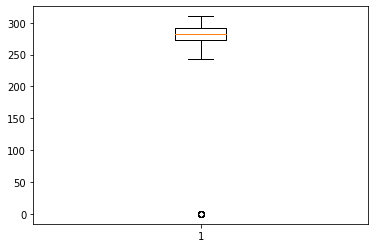

In [7]:
# Your code:
import matplotlib as mpl 
import matplotlib.pyplot as plt 
import numpy as np

T = sample['temperature'].tolist()

#finding outliers using boxplot method

q1, q3= np.percentile(T,[25,75])
iqr = q3 - q1
lower_bound = q1 -(1.5 * iqr) 
upper_bound = q3 +(1.5 * iqr)

#Now we will remove all rows with temperature values outside the bounds and the resulting datset is called clean_data
clean_data = sample

for i in range(rows):
    if clean_data["temperature"][i] < lower_bound or clean_data["temperature"][i] > upper_bound:
        clean_data = clean_data.drop(i)
        
cleanT = clean_data['temperature'].tolist()
x = clean_data.shape

clean_rows = x[0]

remove_count = rows - clean_rows

plt.boxplot(T)
plt.show()




   (b) Compare basic statistical features of "temperature" (median, mean, and mode) in the cleaned and original datasets.    Interpret the differences for these statistical values between the cleaned and original datasets. 

In [8]:
# Your code:
import statistics as st

print('Values for the original dataset:')
print ("Mean value:",st.mean(T),"; Median value:",st.median(T), "Mode value:", st.mode(T))

print('Values for the cleaned dataset:')
print ("Mean value:", st.mean(cleanT),"; Median value:",st.median(cleanT), "Mode value:", st.mode(cleanT))

Values for the original dataset:
Mean value: 281.2182118522958 ; Median value: 282.51 Mode value: 274.15
Values for the cleaned dataset:
Mean value: 281.28304751694566 ; Median value: 282.51599999999996 Mode value: 274.15


   (c) Compare the number of data rows before and after removing the outliers. How many data rows are removed by removing    outliers?

In [9]:
# Your code:
print('The number of data rows before removing outliers:')
print(rows)
print('The number of data rows after removing outliers:')
print(clean_rows)
print('Number of data rows removed by removing outliers:')
print(remove_count)

The number of data rows before removing outliers:
43384
The number of data rows after removing outliers:
43374
Number of data rows removed by removing outliers:
10


### Basic Visualization (10 points)
   (d) Visualize mean and median of "population_density" for non-'None' "holiday" values in the original dataset. Specify    the "holiday" values for which the mean of "population_density" is maximal and for which it is minimal.

In [10]:
# Your code:
#Fetching only those rows with non-None value in Holiday and storing in vis_data 
vis_data = sample

for i in range(rows):
    if vis_data["holiday"][i] == 'None':
        vis_data = vis_data.drop(i)
        
y = vis_data.shape

vis_rows = y[0]

vis_data.sort_values(by=['holiday'], inplace=True)
vis_data.index = pd.RangeIndex(vis_rows)

#Optional - export of non-None holiday dataset
#export_csv = vis_data.to_csv(r'C:\Users\Shrey\DATA SCIENCE\Project 1\holiday_data.csv', index = None, header=True)

In [11]:
pop_den = vis_data['population_density'].tolist()
print('The mean of the filtered population density values is:' , st.mean(pop_den))
print('The median of the filtered population density values is:' , st.median(pop_den))

The mean of the filtered population density values is: 866.7857142857143
The median of the filtered population density values is: 807.5


Maximum mean of population density is 1356.0 which occurs on New Years Day
Minimum mean of population density is 519.4 which occurs on Columbus Day 



<BarContainer object of 11 artists>

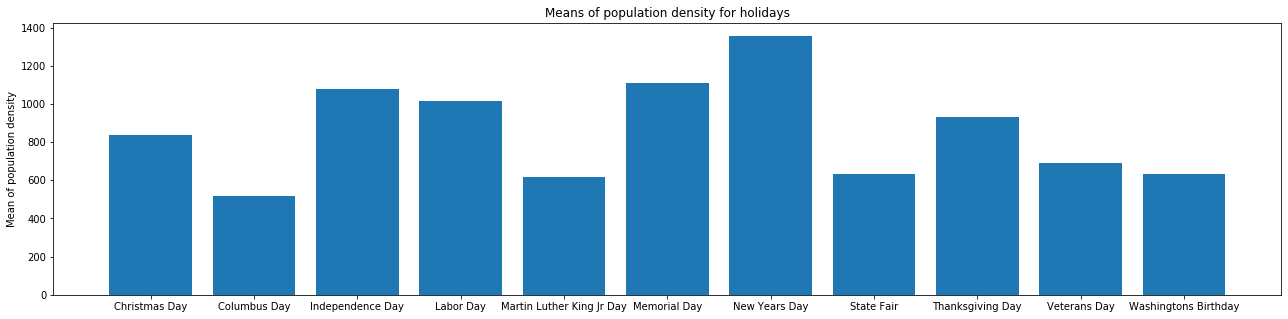

In [12]:
#part b - Visualization and Holidays for which mean is maximum and minimum:

ref = vis_data["holiday"][0]
#sum = 0
count = 0
pointer = 0
means_list = [0]
holiday_list = [ref]

for i in range(vis_rows):
    if vis_data["holiday"][i] == ref:
        means_list[pointer] = means_list[pointer] + pop_den[i]
        count = count + 1
    else:
        means_list = means_list + [pop_den[i]]
        means_list[pointer] = means_list[pointer]/count
        pointer = pointer + 1
        ref = vis_data["holiday"][i]
        holiday_list = holiday_list + [ref]
        count = 1
        #sum = pop_den[i]
        
means_list[pointer] = means_list[pointer]/count

#Optional - for verification
#print('\n',means_list)
#print(holiday_list, '\n\n')



#now finding min and max of the population density mean and the corresponding holidays
x = len(means_list)
max_index = 0
min_index = 0

for i in range(x):
    if means_list[i] > means_list[max_index]:
        max_index = i
    if means_list[i] < means_list[min_index]:
        min_index = i

print('Maximum mean of population density is' , means_list[max_index] , 'which occurs on' , holiday_list[max_index])
print('Minimum mean of population density is' , means_list[min_index] , 'which occurs on' , holiday_list[min_index],'\n')

fig= plt.figure(figsize=(22,5))
plt.title('Means of population density for holidays')
plt.ylabel('Mean of population density')
plt.bar(holiday_list, means_list)

   (e) Plot the distribution of "temperature" in the original and cleaned datasets.

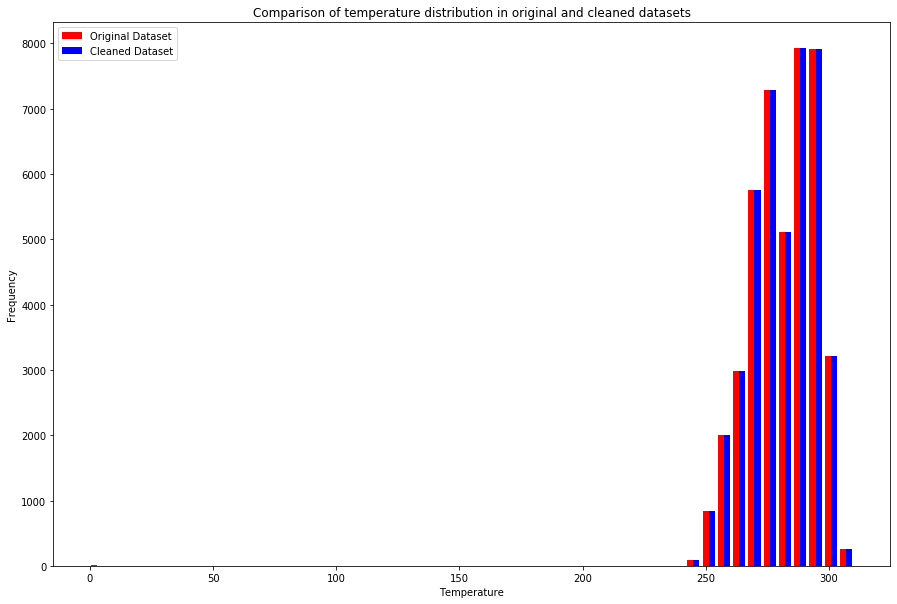

In [13]:
# Your code:
fig= plt.figure(figsize=(15,10))
legend = ['Original Dataset', 'Cleaned Dataset']
plt.hist([T, cleanT], color=['red', 'blue'], bins = 50)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.legend(legend)
plt.title('Comparison of temperature distribution in original and cleaned datasets')
plt.show()

   (f) Explore the distribution of "population_density" and "temperature" together in the cleaned dataset. Specify the ranges of "temperature" and "population_density" for which the frequency of the data is the highest.

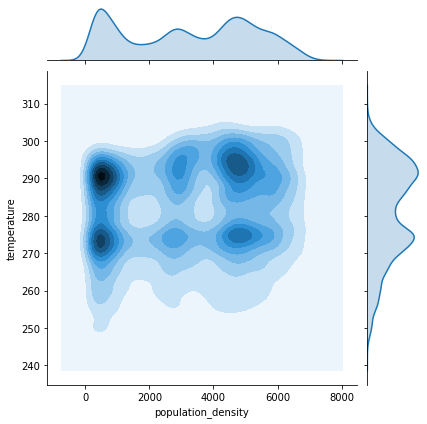

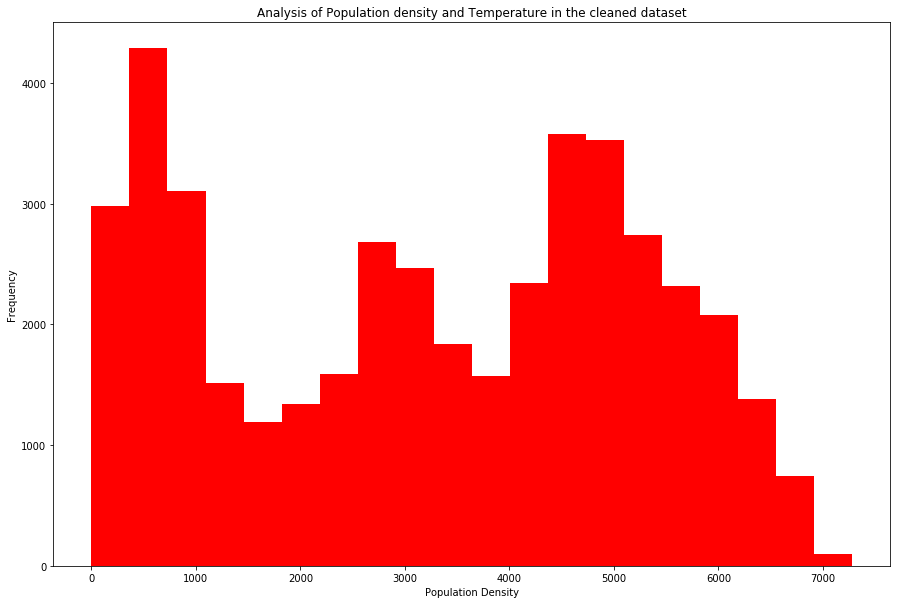

The range of highest frequency of data is for population density from 364.0 to 728.0 . This range changes as we change the number/width of bins.


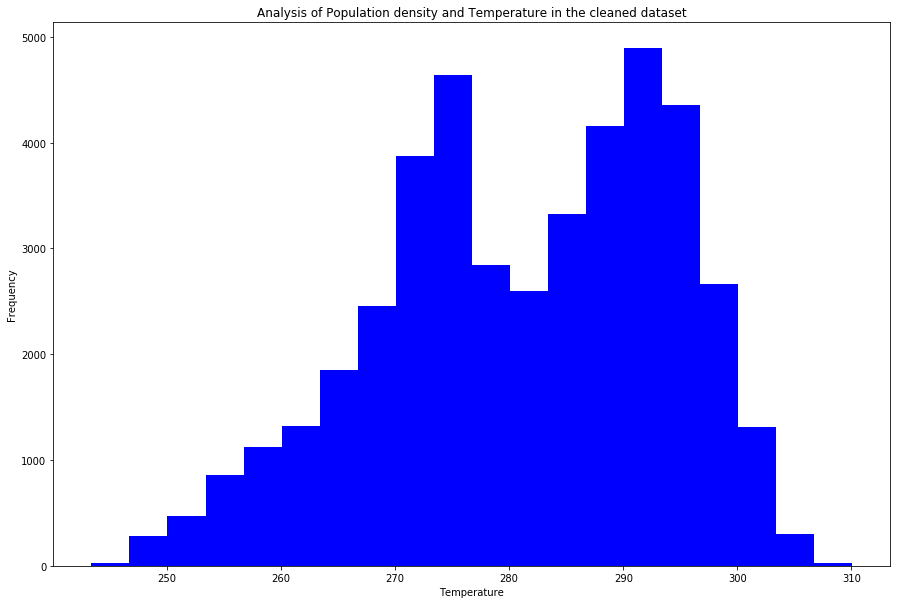

The range of highest frequency of data is for Temperature from 290.066 to 293.4 . This range changes as we change the number/width of bins.


In [14]:
# Your code:
import seaborn as sns
sns.jointplot(x="population_density",y="temperature",data=clean_data,kind="kde")
popclean = clean_data['population_density'].tolist()
fig= plt.figure(figsize=(15,10))
y, x, _ = plt.hist(popclean, color='red', bins = 20)
plt.xlabel("Population Density")
plt.ylabel("Frequency")
plt.title('Analysis of Population density and Temperature in the cleaned dataset')
plt.show()

x = list(x)
y = list(y)

ymax = max(y)
maxpos= y.index(ymax)
print ("The range of highest frequency of data is for population density from", x[maxpos], "to", x[maxpos+1],". This range changes as we change the number/width of bins.")

fig= plt.figure(figsize=(15,10))
y, x, _ = plt.hist(cleanT, color='blue', bins = 20)
plt.xlabel("Temperature")
plt.ylabel("Frequency")
plt.title('Analysis of Population density and Temperature in the cleaned dataset')
plt.show()

x = list(x)
y = list(y)

ymax = max(y)
maxpos= y.index(ymax)
print ("The range of highest frequency of data is for Temperature from", x[maxpos], "to", x[maxpos+1],". This range changes as we change the number/width of bins.")



## Question 2 - Decision Trees (15 points):

   (a) Add a categorical temperature column to the cleaned dataset based on the following rules and name it                "temperature_categorical":
        - temperature >= upper_quartile (third quartile) corresponding value in 'temperature_categorical' column: 'high'
        - temperature <= lower_quartile (first quartile) corresponding value in 'temperature_categorical' column: 'low'
        - lower_quartile < temperature < upper_quartile corresponding value in 'temperature_categorical' column: 'medium'

In [15]:
# Your code:
#filling values in the new column

#Reindexing clean data
clean_data.sort_values(by=['date_time'], inplace=True)
clean_data.index = pd.RangeIndex(clean_rows)

# creating a blank series 
Type_new = [None]*clean_rows 

# running a for loop and asigning some values to series 
for i in range(clean_rows): 
    if clean_data["temperature"][i] >= q3: 
        Type_new[i]="high"
  
    elif sample["temperature"][i] > q1: 
        Type_new[i]="medium"

    else: 
        Type_new[i]= "low"

clean_data.insert(cols, "temperature_categorical", Type_new , True)
cols = cols+1
clean_data.head()

#OPTIONAL - Exporting the created dataset for cross-checking
#export_csv = clean_data.to_csv(r'C:\Users\Shrey\DATA SCIENCE\Project 1\temp_categorical.csv', index = None, header=True)

,holiday,temperature,rain_1h,snow_1h,clouds_percentage,weather_type,weather_type_details,date_time,population_density,population_density_categorical,temperature_categorical
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545,high,medium
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516,high,medium
2,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026,high,medium
3,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918,high,medium
4,None,291.72,0.0,0.0,1,Clear,sky is clear,2012-10-02 14:00:00,5181,high,medium


   (b) In the new dataset (created in Section 'a'), consider "holiday", "temperature_categorical", and "weather_type" as    the descriptive features and "population_density_categorical" as the target feature. Set the minimum number of samples  for splitting to 5000 and make a decision tree based on entropy.

In [16]:
# Your code:
from p_decision_tree.DecisionTree import DecisionTree
columns = clean_data.columns

descriptive_features = ['holiday','weather_type','temperature_categorical']
label = 'population_density_categorical'

#Converting all the columns to string
for column in columns:
    clean_data[column]= clean_data[column].astype(str)

data_descriptive = clean_data[descriptive_features].values
data_label = clean_data[label].values

print("descriptive features:")
print(descriptive_features)
print("\ntarget feature:\n" + label)

descriptive features:
['holiday', 'weather_type', 'temperature_categorical']

target feature:
population_density_categorical


In [17]:
#Calling DecisionTree constructor
decisionTree = DecisionTree(data_descriptive, descriptive_features, data_label.tolist(), "entropy")

#Pruning features (gain_threshold and minimum_samples)
decisionTree.id3(0.002,5000)

#Visualizing decision tree by Graphviz
dot = decisionTree.print_visualTree( render=True )

#print(dot)

print("System entropy: ", format(decisionTree.entropy))

System entropy:  2.2305299175224835


   (c) What is the best attribute (based on entropy) for splitting the tree in the second round of ID3?  

Explanation: We observe that for the 1st round, categorical temperature has the maximum information gain as per the entropy criterion, thus making the top level of the decision tree. In the 2nd level, higher information gain is clearly in the case of weather_type, and also the holiday criterion forms a significant 3rd level only in the specific case of medium temperature and clouds weather_type.
Note that we also see an additional 3rd level partition basis holiday for medium temperature and clear weather type since the minimum sample criterion is fulfilled and information gain threshold is low.


## Question 3 - Regression (10 points):

For this question (Q3), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density*. Drop the information on the date for *date_time* and restrict the data to time values (hour) only.

We define *population_density* to be our target feature, while all other features are considered descriptive.

In [18]:
# Your code:
sample_Reg = sample.drop(['weather_type','weather_type_details','population_density_categorical'],axis=1)
sample_Reg['date_time'] = pd.to_datetime(sample_Reg['date_time']).dt.hour

   (a) Which features are suitable as an input for linear regression and which need to be modified first? Why?

Explanation:
temperature, rain_1h, snow_1h, clouds_percentage, date_time and population_density are suitable as input for linear regression, and holiday should be modified first because it is categorical descriptive feature. The regression function can only handle numerical input.

   (b) Implement and briefly motivate an adequate modification. Print the resulting data set limited to the first two data rows.

Explanation:
Here we present the get_dummies function of pandas to change the cataorical descriptive feature to 0 or 1(nummerical features).

In [19]:
# Your code:
sample_Reg_one_hot = pd.get_dummies(sample_Reg,columns=['holiday'])
sample_Reg_one_hot[:2]

,temperature,rain_1h,snow_1h,clouds_percentage,date_time,population_density,holiday_Christmas Day,holiday_Columbus Day,holiday_Independence Day,holiday_Labor Day,holiday_Martin Luther King Jr Day,holiday_Memorial Day,holiday_New Years Day,holiday_None,holiday_State Fair,holiday_Thanksgiving Day,holiday_Veterans Day,holiday_Washingtons Birthday
0,288.28,0.0,0.0,40,9,5545,0,0,0,0,0,0,0,1,0,0,0,0
1,289.36,0.0,0.0,75,10,4516,0,0,0,0,0,0,0,1,0,0,0,0


(c) To get a first idea about our data, plot the behaviour of the target feature (population_density) over time (date_time).

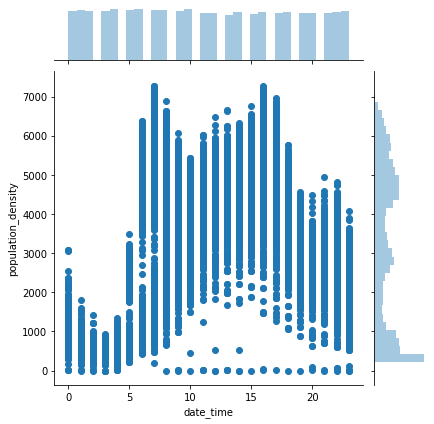

In [20]:
# Your code:
import seaborn as sns
sns.jointplot(sample_Reg_one_hot['date_time'],sample_Reg_one_hot['population_density'])

   (d) Create two distinct subsets of the data. Use sampling methods as described in the lecture. You should end up with two DIFFERENT sample data sets *RegA, RegB*. Include these data sets in the submitted data set zip file. 
   
   Which sampling methods did you choose and why? Which one do you expect to result in a better classifier?

In [21]:
# Your code:
RegA = sample_Reg_one_hot.groupby('temperature', group_keys=False).apply(lambda x: x.sample(min(len(x), 1)))
RegB = sample_Reg_one_hot.sample(n=5772)
RegA.to_csv(r'/home/yuchen/Semester_3/Data Science/assignment1_final/RegA.csv', index = None, header=True)
RegB.to_csv(r'/home/yuchen/Semester_3/Data Science/assignment1_final/RegB.csv', index = None, header=True)

Explanation:RegA used stratified sampling, RegB used random sampling. Stratified sampling ensured that the relative frequencies are maintained. Random sampling is simple, and each individual has the same probability of being chosen. The classifier trained using RegA should be a better classifier.


   (e) Train a linear regression classifier based on each of the two sample data sets *RegA, RegB* created before.

In [22]:
# Your code:
from sklearn.linear_model import LinearRegression
features = RegA.columns.tolist()
features.remove('population_density') #we use all descriptive features, but not the target feature
x1 = RegA[features]
y1 = RegA['population_density']
# classifier1 = LogisticRegression( solver = 'liblinear', multi_class = 'ovr')
classifier1 = LinearRegression()
classifier1.fit(x1, y1)
y_pred1 = classifier1.predict(x1)
x2 = RegB[features]
y2 = RegB['population_density']
# classifier2 = LogisticRegression( solver = 'liblinear', multi_class = 'ovr')
classifier2 = LinearRegression()
classifier2.fit(x2, y2)
y_pred2 = classifier2.predict(x2)


(f) Visualize both computed regression functions in one plot each, combined with the original data set. For example, you can show a plot similar to 3(c) and insert the regression functions result.

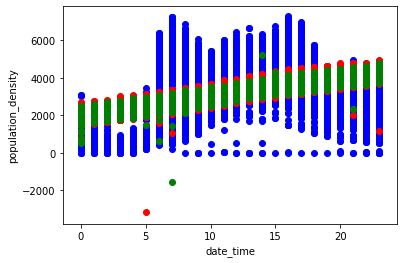

In [52]:
# Your code:
plt.scatter(sample_Reg_one_hot['date_time'],sample_Reg_one_hot['population_density'],color='b')
plt.xlabel("date_time")
plt.ylabel("population_density")
plt.scatter(x1[['date_time']],y_pred1,color='r')
plt.scatter(x2[['date_time']],y_pred2,color='g')


   (g) For each of the two resulting models compute and print the mean squared error, mean absolute error and median squared error with respect to the original, non-sampled data set. Also, present plots showing the errors and squared errors.

Mean squared error for RegA:
3304304.1376959016
Mean absolute error for RegA:
1594.5043167272913
Median absolute error for RegA:
1591.5030450472464
Median squared error for RegA:
19072443482.780743
Mean squared error for RegB:
3429136.850444474
Mean absolute error for RegB:
1635.3545479650893
Median absolute error for RegB:
1624.1186112851574
Median squared error for RegB:
19792977900.765503


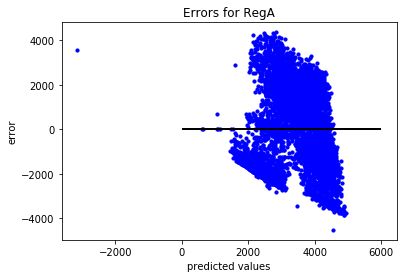

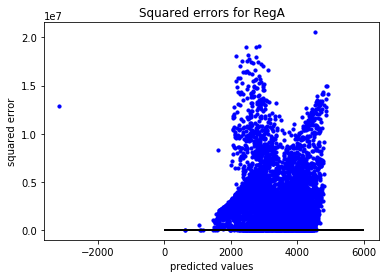

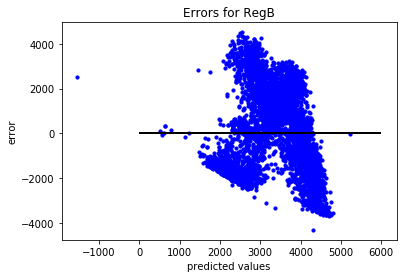

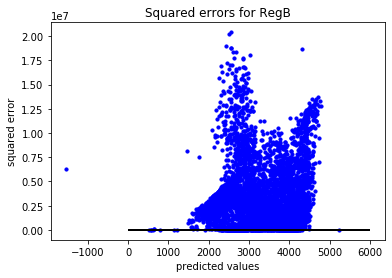

In [24]:
# Your code:
from sklearn.metrics import mean_squared_error, mean_absolute_error, median_absolute_error
import numpy as np
print("Mean squared error for RegA:")
print(mean_squared_error(y1, y_pred1))
print("Mean absolute error for RegA:")
print(mean_absolute_error(y1, y_pred1))
print("Median absolute error for RegA:")
print(median_absolute_error(y1, y_pred1))
print("Median squared error for RegA:")
print(np.median(mean_squared_error(y1, y_pred1)*y1.shape[0])) #We do not know what median squared error is
print("Mean squared error for RegB:")
print(mean_squared_error(y2, y_pred2))
print("Mean absolute error for RegB:")
print(mean_absolute_error(y2, y_pred2))
print("Median absolute error for RegB:")
print(median_absolute_error(y2, y_pred2))
print("Median squared error for RegB:")
print(np.median(mean_squared_error(y2, y_pred2)*y2.shape[0]))

plt.scatter(y_pred1, y1 - y_pred1, color = "blue", s = 10,) 
plt.title("Errors for RegA")
## plotting line for zero error 
plt.hlines(y = 0, xmin = 0, xmax = 6000, linewidth = 2) 
plt.xlabel('predicted values')
plt.ylabel('error')
plt.show()

plt.scatter(y_pred1, (y1 - y_pred1) ** 2, color = "blue", s = 10,) 
plt.title("Squared errors for RegA")
## plotting line for zero error 
plt.hlines(y = 0, xmin = 0, xmax = 6000, linewidth = 2) 
plt.xlabel('predicted values')
plt.ylabel('squared error')
plt.show()

plt.scatter(y_pred2, y2 - y_pred2, color = "blue", s = 10,) 
plt.title("Errors for RegB")
## plotting line for zero error 
plt.hlines(y = 0, xmin = 0, xmax = 6000, linewidth = 2) 
plt.xlabel('predicted values')
plt.ylabel('error')
plt.show()

plt.scatter(y_pred2, (y2 - y_pred2) ** 2, color = "blue", s = 10,) 
plt.title("Squared errors for RegB")
## plotting line for zero error 
plt.hlines(y = 0, xmin = 0, xmax = 6000, linewidth = 2) 
plt.xlabel('predicted values')
plt.ylabel('squared error')
plt.show()

   (h) Interpret and evaluate the two models and compare them. Why are they similar/different? Which model do you recommend and why? How do you think the applied methods could be improved to get better results?

Explanation:The two models do not behave very well, but the results are similiar. Since the two models all used linear regression, the only difference is the sampling method. Based on a big dataset, both random sampling and stratified sampling can get good samples. However, we can see from the plot that the date_time and population_density data do not have a linear relationship. To get better results we can apply other classifiers. I tried LogisticRegression with liblinear library, and I got much better result.


## Question 4 - Support Vector Machines (10 points):

For this question (Q4), restrict your extracted data set to the columns *holiday, temperature, rain_1h, snow_1h, clouds_percentage, date_time* and *population_density_categorical*. For *date_time*, drop the information on the date and restrict the data to time values only.
We define *population_density_categorical* to be our target feature, while all other features are considered descriptive.


In [26]:
# Your code:
sample_SVM = sample.drop(['weather_type','weather_type_details','population_density'],axis=1)
sample_SVM['date_time'] = pd.to_datetime(sample_SVM['date_time']).dt.hour
print(sample_SVM[:5])

  holiday  temperature  rain_1h  snow_1h  clouds_percentage  date_time  \
0    None       288.28      0.0      0.0                 40          9   
1    None       289.36      0.0      0.0                 75         10   
2    None       290.13      0.0      0.0                 90         12   
3    None       291.14      0.0      0.0                 75         13   
4    None       291.72      0.0      0.0                  1         14   

  population_density_categorical  
0                           high  
1                           high  
2                           high  
3                           high  
4                           high  


   (a) Which features are suitable as an input for SVM and which need to be modified first? Modify the data as needed and provide a brief explanation.

In [27]:
# Your code:
sample_SVM_one_hot = pd.get_dummies(sample_SVM,columns=['holiday'])
sample_SVM_one_hot.shape

(43384, 18)

Explanation:
Temperature, rain_1h, snow_1h, clouds_percentage and date_time are suitable as input for SVM, and holiday should be modified first because it is categorical descriptive feature. We should change it to numbers.

   (b) Divide the data set into a training set *svmTrain* and a test set *svmTest* and briefly motivate your division      strategy. Include these data sets in the data set zip file you submit. 
   
   Hint: Training the SVMs will take longer for a large training set!

In [27]:
# Your code:
from sklearn.model_selection import train_test_split
sample_SVM_one_hot = sample_SVM_one_hot.sample(n=4000)
features_SVM = sample_SVM_one_hot.columns.tolist()
features_SVM.remove('population_density_categorical')
X_train_SVM,X_test_SVM,y_train_SVM,y_test_SVM = train_test_split(sample_SVM_one_hot[features_SVM],sample_SVM_one_hot['population_density_categorical'],test_size=0.2)
svmTrain = pd.concat([X_train_SVM,y_train_SVM], axis=1, sort=False)
svmTest = pd.concat([X_test_SVM,y_test_SVM], axis=1, sort=False)
svmTrain.to_csv(r'/home/yuchen/Semester_3/Data Science/assignment1_final/svmTrain.csv', index = None, header=True)
svmTest.to_csv(r'/home/yuchen/Semester_3/Data Science/assignment1_final/svmTest.csv', index = None, header=True)

Explanation:
First shuffle the data before splitting, since our dataset is big we took 4000 samples for training, and we take 20% data for testing.

   (c) Use the training set to train 3 different SVMs with different combinations of the parameters. Use at least two distinct values for the parameters *kernel* and *C*.

In [28]:
# Your code:
from sklearn.svm import SVC

classifier1 = SVC(C=1, kernel='linear',gamma='auto')
classifier1.fit(X_train_SVM, y_train_SVM)
classifier2 = SVC(C=2, kernel='sigmoid',gamma='auto')
classifier2.fit(X_train_SVM, y_train_SVM)
classifier3 = SVC(C=1, kernel='poly',gamma='auto')
classifier3.fit(X_train_SVM, y_train_SVM)
pred1_SVM = classifier1.predict(X_test_SVM)
pred2_SVM = classifier2.predict(X_test_SVM)
pred3_SVM = classifier3.predict(X_test_SVM)

   (d) Compute and print the mean accurracy and classification report of the trained SVMs with respect to the test set (as shown in instruction).

In [29]:
# Your code:
from sklearn.metrics import classification_report
print('Accuracy: \n', classifier1.score(X_test_SVM,pred1_SVM), '\n')
print('Classification Report: \n', classification_report(y_test_SVM, pred1_SVM), '\n')  
print('Accuracy: \n', classifier2.score(X_test_SVM,pred2_SVM), '\n')
print('Classification Report: \n', classification_report(y_test_SVM, pred2_SVM), '\n')  
print('Accuracy: \n', classifier3.score(X_test_SVM,pred3_SVM), '\n')
print('Classification Report: \n', classification_report(y_test_SVM, pred3_SVM), '\n')  

Accuracy: 
 1.0 

Classification Report: 
               precision    recall  f1-score   support

        high       0.62      0.76      0.68       222
         low       0.42      0.34      0.38       118
      medium       0.38      0.35      0.36       154
   very high       0.00      0.00      0.00        67
    very low       0.73      0.88      0.80       239

    accuracy                           0.59       800
   macro avg       0.43      0.47      0.44       800
weighted avg       0.52      0.59      0.55       800
 

Accuracy: 
 1.0 

Classification Report: 
               precision    recall  f1-score   support

        high       0.28      1.00      0.43       222
         low       0.00      0.00      0.00       118
      medium       0.00      0.00      0.00       154
   very high       0.00      0.00      0.00        67
    very low       0.00      0.00      0.00       239

    accuracy                           0.28       800
   macro avg       0.06      0.20      0.09

/home/yuchen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yuchen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


   (e) Interpret and evaluate the 3 SVMs and compare them. Why are they similar/different? Which SVM do you recommend and why?

Explanation:The third SVM has the best result. It has polynomial kernel, compared to linear kernel of the first SVM. The second SVM does not behave well, because the C value is too big. So the SVM with kernel "ploy" and C=1 is recommended, because our problem is only 0-1 classification problem.


## Question 5 - Neural Networks (20 points)
In this question consider the whole dataset that you have created in the *Preprocessing of Dataset* section. The target feature is *population_density_categorical*. 

To avoid performance problems, use the first 4000 rows of your dataset (you will need 2000 for training and 2000 for testing).

   (a) What are the possible inputs of your network?
     - Show the possible extracted features.
     - Show the number of possible patterns of inputs for the categorical data.

In [6]:
# Your code:
sample_nn = sample[:4000]
sample_nn['date_time'] = pd.to_datetime(sample_nn['date_time']).dt.hour

print(len(sample_nn['holiday'].unique()),len(sample_nn['weather_type'].unique()),len(sample_nn['weather_type_details'].unique()))
sample_nn.head()

7 9 23


C:\Users\sajid\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,holiday,temperature,rain_1h,snow_1h,clouds_percentage,weather_type,weather_type_details,date_time,population_density,population_density_categorical
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,9,5545,high
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,10,4516,high
2,None,290.13,0.0,0.0,90,Clouds,overcast clouds,12,5026,high
3,None,291.14,0.0,0.0,75,Clouds,broken clouds,13,4918,high
4,None,291.72,0.0,0.0,1,Clear,sky is clear,14,5181,high


Explanation:
The possible inputs of the network are all the features (except population_density_categorical) in the sample after one hot encoding. And for time we restrict the data to hour as we did above.
We have 7x9x23=1449 possible patterns of inputs for the categorical data.

   (b) Before using the Neural Network algorithm, do you think it provides an accurate result? Why? 
     - Your explanation should be supported by data.

Explanation:


In [25]:
# Your code:

print('Unique holiday values =',len(sample_nn.holiday.unique()))
print('Unique temperature values =',len(sample_nn.temperature.unique()))
print('Unique rain_1h values =',len(sample_nn.rain_1h.unique()))
print('Unique snow_1h values =',len(sample_nn.snow_1h.unique()))
print('Unique clouds_percentage values =',len(sample_nn.clouds_percentage.unique()))
print('Unique weayher_type values =',len(sample_nn.weather_type.unique()))
print('Unique weather_type_details values =',len(sample_nn.weather_type_details.unique()))
print('Unique date_time values =',len(sample_nn.date_time.unique()))
print('Unique population_density values =',len(sample_nn.population_density.unique()))

Unique holiday values = 7
Unique temperature values = 2030
Unique rain_1h values = 1
Unique snow_1h values = 1
Unique clouds_percentage values = 55
Unique weayher_type values = 9
Unique weather_type_details values = 23
Unique date_time values = 24
Unique population_density values = 2515


From above we can see that each feature has very less unique values with popultion_density being the hishest with 2515 unique values. With a data of 4000 cases, the neural network algorithm should be able to predict the output which is categorical (with 5 unique values) quite accurately.

   (c) Which features can be used for designing your network as inputs? Why?
       - Which features should be changed (example: from categorical to numerical or numerical to categorical)? Why? 
       - Convert the features. 

Explanation:
The catagorical features holiday and weather_type should be converted into numerical using one hot encoding.

In [32]:
# Your code:
sample_nn_one_hot = pd.get_dummies(sample_nn,columns=['holiday','weather_type','weather_type_details'])

   (d) Train your network with default hyperparameters and return the parameters.

In [33]:
# Your code:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
features = sample_nn_one_hot.columns.tolist()
features.remove('population_density_categorical')
X =sample_nn_one_hot[features]
Y =sample_nn_one_hot['population_density_categorical']
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.5)
nn = MLPClassifier()
a = nn.fit(X_train,y_train)
print(nn.score(X_test,y_test))
print(nn.get_params())

0.855
{'activation': 'relu', 'alpha': 0.0001, 'batch_size': 'auto', 'beta_1': 0.9, 'beta_2': 0.999, 'early_stopping': False, 'epsilon': 1e-08, 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.001, 'max_iter': 200, 'momentum': 0.9, 'n_iter_no_change': 10, 'nesterovs_momentum': True, 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'solver': 'adam', 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': False, 'warm_start': False}


   (e) Try to find an optimized number of hidden layers and nodes. 
      - Start with default numbers and then at least go with one number above and one number below the default.
      - Use the 2000 rows of the data for training.
      - What are the optimized numbers of hidden layers and nodes that you have found?

In [34]:
# Your code: (number of hidden layers)
nn1 = MLPClassifier(hidden_layer_sizes=())  #set max_iter to 1000 because 200 is not sufficient for convergence
a1 = nn1.fit(X_train,y_train)
print("()")
print(nn1.score(X_test,y_test))

nn2 = MLPClassifier(hidden_layer_sizes=(100,100))
a2 = nn2.fit(X_train,y_train)
print("(100,100)")
print(nn2.score(X_test,y_test))

nn3 = MLPClassifier(hidden_layer_sizes=(100,100,100))
a3 = nn3.fit(X_train,y_train)
print("(100,100,100)")
print(nn3.score(X_test,y_test))

/home/yuchen/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


()
0.911
(100,100)
0.7275
(100,100,100)
0.777


In [35]:
# Your code: (number of nodes in the hidden layer)
nn4 = MLPClassifier(hidden_layer_sizes=(10,))
a = nn4.fit(X_train,y_train)
print("(10,)")
print(nn4.score(X_test,y_test))

nn5 = MLPClassifier(hidden_layer_sizes=(50,))
a = nn5.fit(X_train,y_train)
print("(50,)")
print(nn5.score(X_test,y_test))


nn6 = MLPClassifier(hidden_layer_sizes=(200,))
a = nn6.fit(X_train,y_train)
print("(200,)")
print(nn6.score(X_test,y_test))

nn7 = MLPClassifier(hidden_layer_sizes=(200,))
a = nn7.fit(X_train,y_train)
print("(500,)")
print(nn7.score(X_test,y_test))

(10,)
0.759
(50,)
0.774
(200,)
0.8235
(500,)
0.8115


In [36]:
# Your code: (optimized network) 
nn_OPT = MLPClassifier(hidden_layer_sizes=(10,10,10))
a = nn_OPT.fit(X_train,y_train)
print("(10,10,10)")
print(nn_OPT.score(X_test,y_test))

(10,10,10)
0.9205


Explanation:
We can first see that without hidden layer, we got a good accuracy of 0.9185. And with 2 hidden layers we also get a accuracy of 0.8925. Then we compared different number of nodes, and 10 gave the best accuracy of 0.938. So finally we used 2 hidden layers with 10 nodes in each layer, and found the best accuracy of 0.9455. Howerver, due to different initialization of weights, we got different networks each time we run the code. So the parameters we found may not be optimal.

   (f) Try to train your model with one linear activation function and one non-linear activation function. Use the default number of hidden layers and nodes.
     - Name the functions and explain how the results are different and why. 
     - You can use evaluation metrics to show which activation function works better for this data set.
     - Use the 2000 rows of the data for training.

In [37]:
# Your code: (linear activation function):
nn_lin = MLPClassifier(activation='identity')
a = nn_lin.fit(X_train,y_train)
print("identity")
print(nn_lin.score(X_test,y_test))


identity
0.8065


In [38]:
# Your code: (non-linear activation function):
nn_non = MLPClassifier(activation='logistic')
a = nn_non.fit(X_train,y_train)
print("logistic")
print(nn_non.score(X_test,y_test))

# nn = MLPClassifier(activation='tanh')
# a = nn.fit(X_train,y_train)
# print("tanh")
# print(nn.score(X_test,y_test))

# nn = MLPClassifier(activation='relu')
# a = nn.fit(X_train,y_train)
# print("relu")
# print(nn.score(X_test,y_test))

logistic
0.9345


Explanation:
As we can see, the nonlinear activation functions work better than the linear one, because linear activation function doesn’t help with the complexity or various parameters of usual data that is fed to the neural networks.The nonlinear activation function makes it easy for the model to generalize or adapt with variety of data and to differentiate between the output.

## Question 6 - Evaluation (10 Points)

   (a) Consider one of the models in question 4 (c) of your choice, one neural network with optimized number of hidden layers and nodes from question 5 (e), and the neural network with non-linear activation function from question 5 (f), for a total of *three* models, together with their respective datasets. Compute the following metrics for a 3-fold cross validation performed on each model:

- Confusion matrices on the training data (sum cell-by-cell the results of each fold)

In [28]:
# Your code for the confusion matrices on the training data

#SVM
from sklearn.model_selection import KFold
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC


sample_SVM_one_hot = sample_SVM_one_hot[:4000]
method1 = SVC(C=1, kernel='poly',gamma='auto')
features_SVM = sample_SVM_one_hot.columns.tolist()
features_SVM.remove('population_density_categorical')
kf1 = KFold(n_splits=3)
kf1.get_n_splits(sample_SVM_one_hot)
X1 = np.array(sample_SVM_one_hot[features_SVM])
y1 = np.array(sample_SVM_one_hot['population_density_categorical'])
cm = np.zeros((5,5))

for train_index, test_index in kf1.split(X1):
    method1.fit(X1[train_index],y1[train_index])
    pred = method1.predict(X1[train_index])
    cm = confusion_matrix(y1[train_index],pred)+cm
print(cm)
    
    
    

[[1.606e+03 6.400e+01 3.500e+02 1.000e+00 5.700e+01]
 [2.430e+02 8.160e+02 1.650e+02 0.000e+00 2.800e+02]
 [7.580e+02 1.760e+02 4.930e+02 0.000e+00 1.100e+01]
 [5.670e+02 1.100e+01 1.800e+02 0.000e+00 4.000e+00]
 [1.050e+02 2.660e+02 4.000e+00 0.000e+00 1.843e+03]]


In [40]:
# Optimized network 
nn_OPT = MLPClassifier(hidden_layer_sizes=(10,10,10))

features = sample_nn_one_hot.columns.tolist()
features.remove('population_density_categorical')

kf1 = KFold(n_splits=3)
kf1.get_n_splits(sample_nn_one_hot)
X = np.array(sample_nn_one_hot[features])
y = np.array(sample_nn_one_hot['population_density_categorical'])
cm = np.zeros((5,5))
for train_index, test_index in kf1.split(X):
    nn_OPT.fit(X[train_index],y[train_index])
    pred = nn_OPT.predict(X[train_index])
    cm = confusion_matrix(y[train_index],pred)+cm
print(cm)

[[1894.    0.  124.   60.    0.]
 [   0. 1479.   14.    0.   11.]
 [  56.   52. 1330.    0.    0.]
 [ 201.    0.    0.  561.    0.]
 [   0.    8.    0.    0. 2210.]]


In [41]:
# Non linear Activation function

nn_non = MLPClassifier(activation='logistic')

features = sample_nn_one_hot.columns.tolist()
features.remove('population_density_categorical')

kf1 = KFold(n_splits=3)
kf1.get_n_splits(sample_nn_one_hot)
X = np.array(sample_nn_one_hot[features])
y = np.array(sample_nn_one_hot['population_density_categorical'])
cm = np.zeros((5,5))
for train_index, test_index in kf1.split(X):
    nn_non.fit(X[train_index],y[train_index])
    pred = nn_non.predict(X[train_index])
    cm = confusion_matrix(y[train_index],pred)+cm
print(cm)

[[1911.    0.  106.   61.    0.]
 [   0. 1458.   39.    0.    7.]
 [  69.   52. 1317.    0.    0.]
 [  90.    0.    0.  672.    0.]
 [   0.   25.    0.    0. 2193.]]


- Confusion matrices on the test data (sum cell-by-cell the results of each fold)

In [29]:
# Your code for the confusion matrices on the test data

#SVM

sample_SVM_one_hot = sample_SVM_one_hot[:4000]
method1 = SVC(C=1, kernel='poly',gamma='auto')
kf1 = KFold(n_splits=3)
kf1.get_n_splits(sample_SVM_one_hot)
X1 = np.array(sample_SVM_one_hot[features_SVM])
y1 = np.array(sample_SVM_one_hot['population_density_categorical'])

cm = np.zeros((5,5))
for train_index, test_index in kf1.split(X1):
    method1.fit(X1[train_index],y1[train_index])
    pred = method1.predict(X1[test_index])
    cm = confusion_matrix(y1[test_index],pred)+cm
print(cm)

[[748.  26. 205.   0.  60.]
 [116. 397.  90.   0. 149.]
 [371. 126. 216.   0.   6.]
 [232.  30. 114.   0.   5.]
 [ 45. 126.   2.   0. 936.]]


In [43]:
# Optimized network 
nn_OPT = MLPClassifier(hidden_layer_sizes=(10,10,10))

features = sample_nn_one_hot.columns.tolist()
features.remove('population_density_categorical')

kf1 = KFold(n_splits=3)
kf1.get_n_splits(sample_nn_one_hot)
X = np.array(sample_nn_one_hot[features])
y = np.array(sample_nn_one_hot['population_density_categorical'])
cm = np.zeros((5,5))
for train_index, test_index in kf1.split(X):
    nn_OPT.fit(X[train_index],y[train_index])
    pred = nn_OPT.predict(X[test_index])
    cm = confusion_matrix(y[test_index],pred)+cm
print(cm)

[[ 945.    0.   64.   30.    0.]
 [   0.  711.   34.    0.    7.]
 [  49.   27.  643.    0.    0.]
 [ 105.    0.    0.  276.    0.]
 [   0.    8.    0.    0. 1101.]]


In [44]:
# Non linear Activation function

nn_non = MLPClassifier(activation='logistic')

features = sample_nn_one_hot.columns.tolist()
features.remove('population_density_categorical')

kf1 = KFold(n_splits=3)
kf1.get_n_splits(sample_nn_one_hot)
X = np.array(sample_nn_one_hot[features])
y = np.array(sample_nn_one_hot['population_density_categorical'])
cm = np.zeros((5,5))
for train_index, test_index in kf1.split(X):
    nn_non.fit(X[train_index],y[train_index])
    pred = nn_non.predict(X[test_index])
    cm = confusion_matrix(y[test_index],pred)+cm
print(cm)

[[ 872.    0.  135.   32.    0.]
 [   0.  731.   15.    0.    6.]
 [  33.   44.  642.    0.    0.]
 [ 103.    0.    0.  278.    0.]
 [   0.    9.    0.    0. 1100.]]


- Precision, recall and F1-scores on the test data (give explicitly the result for each fold)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, recall_score

In [32]:
# Your code for precision, recall and F1-scores on the test data

#SVM
sample_SVM_one_hot = sample_SVM_one_hot[:4000]
method1 = SVC(C=1, kernel='poly',gamma='auto')
kf1 = KFold(n_splits=3)
kf1.get_n_splits(sample_SVM_one_hot)
X1 = np.array(sample_SVM_one_hot[features_SVM])
y1 = np.array(sample_SVM_one_hot['population_density_categorical'])

cm = np.zeros((5,5))
for train_index, test_index in kf1.split(X1):
    method1.fit(X1[train_index],y1[train_index])
    pred = method1.predict(X1[test_index])
    print("Precision Score =",precision_score(y1[test_index], pred, average=None))
    print("Recall Score =",recall_score(y1[test_index], pred, average=None))
    print("F1 score =",f1_score(y1[test_index], pred,average=None))
    print("\n")


C:\Users\sajid\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sajid\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision Score = [0.54792043 0.51492537 0.5        0.         0.79746835]
Recall Score = [0.79527559 0.62162162 0.29207921 0.         0.84450402]
F1 score = [0.64882227 0.56326531 0.36875    0.         0.8203125 ]




C:\Users\sajid\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sajid\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Precision Score = [0.4580292  0.68341709 0.38034188 0.         0.85795455]
Recall Score = [0.76993865 0.46896552 0.34230769 0.         0.81401617]
F1 score = [0.57437071 0.55623722 0.36032389 0.         0.83540802]


Precision Score = [0.47201946 0.51680672 0.24727273 0.         0.7799511 ]
Recall Score = [0.58433735 0.5125     0.26459144 0.         0.8739726 ]
F1 score = [0.52220727 0.51464435 0.2556391  0.         0.82428941]




C:\Users\sajid\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\sajid\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [47]:
# Optimized network 
nn_OPT = MLPClassifier(hidden_layer_sizes=(10,10,10))

features = sample_nn_one_hot.columns.tolist()
features.remove('population_density_categorical')

kf1 = KFold(n_splits=3)
kf1.get_n_splits(sample_nn_one_hot)
X = np.array(sample_nn_one_hot[features])
y = np.array(sample_nn_one_hot['population_density_categorical'])
cm = np.zeros((5,5))
for train_index, test_index in kf1.split(X):
    nn_OPT.fit(X[train_index],y[train_index])
    pred = nn_OPT.predict(X[test_index])
    print("Precision Score =",precision_score(y[test_index], pred, average=None))
    print("Recall Score =",recall_score(y[test_index], pred, average=None))
    print("F1 score =",f1_score(y[test_index], pred,average=None))
    print("\n")

Precision Score = [0.69868996 0.9375     0.7480315  1.         0.97631579]
Recall Score = [0.83989501 0.94594595 0.94059406 0.11538462 0.99463807]
F1 score = [0.76281287 0.94170404 0.83333333 0.20689655 0.98539177]


Precision Score = [0.78440367 0.95652174 0.97630332 0.35833333 1.        ]
Recall Score = [0.52453988 0.9862069  0.79230769 1.         0.98382749]
F1 score = [0.62867647 0.97113752 0.87473461 0.52760736 0.99184783]


Precision Score = [0.36047774 1.         0.         0.         0.96306069]
Recall Score = [1.     0.1375 0.     0.     1.    ]
F1 score = [0.52992817 0.24175824 0.         0.         0.9811828 ]




/home/yuchen/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/yuchen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/yuchen/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [48]:
# Non linear Activation function

nn_non = MLPClassifier(activation='logistic')

features = sample_nn_one_hot.columns.tolist()
features.remove('population_density_categorical')

kf1 = KFold(n_splits=3)
kf1.get_n_splits(sample_nn_one_hot)
X = np.array(sample_nn_one_hot[features])
y = np.array(sample_nn_one_hot['population_density_categorical'])
cm = np.zeros((5,5))
for train_index, test_index in kf1.split(X):
    nn_non.fit(X[train_index],y[train_index])
    pred = nn_non.predict(X[test_index])
    print("Precision Score =",precision_score(y[test_index], pred, average=None))
    print("Recall Score =",recall_score(y[test_index], pred, average=None))
    print("F1 score =",f1_score(y[test_index], pred,average=None))
    print("\n")

Precision Score = [0.8766756  0.88842975 0.76754386 0.99099099 0.98157895]
Recall Score = [0.85826772 0.96846847 0.86633663 0.70512821 1.        ]
F1 score = [0.86737401 0.92672414 0.81395349 0.82397004 0.99070385]


Precision Score = [0.84473684 0.96232877 0.95515695 0.94805195 1.        ]
Recall Score = [0.98466258 0.96896552 0.81923077 0.84883721 0.97304582]
F1 score = [0.90934844 0.96563574 0.88198758 0.89570552 0.9863388 ]


Precision Score = [0.94753086 1.         0.91287879 0.88461538 0.99455041]
Recall Score = [0.9246988  0.925      0.93774319 0.99280576 1.        ]
F1 score = [0.93597561 0.96103896 0.92514395 0.93559322 0.99726776]




- Accuracy scores on training and test data (give explicitly the result for each fold)

In [33]:
# Your code for accuracy scores on training and test data

#SVM

sample_SVM_one_hot = sample_SVM_one_hot[:4000]
method1 = SVC(C=1, kernel='poly',gamma='auto')
kf1 = KFold(n_splits=3)
kf1.get_n_splits(sample_SVM_one_hot)
X1 = np.array(sample_SVM_one_hot[features_SVM])
y1 = np.array(sample_SVM_one_hot['population_density_categorical'])
for train_index, test_index in kf1.split(X1):
    method1.fit(X1[train_index],y1[train_index])
    pred = method1.predict(X1[train_index])
    print("Accuracy on Training data =",accuracy_score(y1[train_index], pred))
    pred = method1.predict(X1[test_index])
    print("Accuracy on Test data =",accuracy_score(y1[test_index], pred))
    print("\n")



Accuracy on Training data = 0.5911477869467366
Accuracy on Test data = 0.610944527736132


Accuracy on Training data = 0.5860517435320585
Accuracy on Test data = 0.5836459114778695


Accuracy on Training data = 0.6070491188601425
Accuracy on Test data = 0.5281320330082521




In [50]:
# Optimized network 
nn_OPT = MLPClassifier(hidden_layer_sizes=(10,10,10))

features = sample_nn_one_hot.columns.tolist()
features.remove('population_density_categorical')

kf1 = KFold(n_splits=3)
kf1.get_n_splits(sample_nn_one_hot)
X = np.array(sample_nn_one_hot[features])
y = np.array(sample_nn_one_hot['population_density_categorical'])
cm = np.zeros((5,5))
for train_index, test_index in kf1.split(X):
    nn_OPT.fit(X[train_index],y[train_index])
    pred = nn_OPT.predict(X[train_index])
    print("Accuracy on Training data =",accuracy_score(y[train_index], pred))
    pred = nn_OPT.predict(X[test_index])
    print("Accuracy on Test data =",accuracy_score(y[test_index], pred))
    print("\n")

Accuracy on Training data = 0.9508627156789198
Accuracy on Test data = 0.9137931034482759




/home/yuchen/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Accuracy on Training data = 0.7799025121859767
Accuracy on Test data = 0.8064516129032258


Accuracy on Training data = 0.9261342332208474
Accuracy on Test data = 0.9212303075768942




In [51]:
# Non linear Activation function

nn_non = MLPClassifier(activation='logistic')

features = sample_nn_one_hot.columns.tolist()
features.remove('population_density_categorical')

kf1 = KFold(n_splits=3)
kf1.get_n_splits(sample_nn_one_hot)
X = np.array(sample_nn_one_hot[features])
y = np.array(sample_nn_one_hot['population_density_categorical'])

for train_index, test_index in kf1.split(X):
    nn_non.fit(X[train_index],y[train_index])
    pred = nn_non.predict(X[train_index])
    print("Accuracy on Training data =",accuracy_score(y[train_index], pred))
    pred = nn_non.predict(X[test_index])
    print("Accuracy on Test data =",accuracy_score(y[test_index], pred))
    print("\n")

Accuracy on Training data = 0.9628657164291072
Accuracy on Test data = 0.876311844077961


Accuracy on Training data = 0.937007874015748
Accuracy on Test data = 0.9437359339834959


Accuracy on Training data = 0.9437570303712036
Accuracy on Test data = 0.9399849962490623




In order to turn numbers into insights, please comment on your findings. Motivate the answers to the following questions using the metrics and the findings in the questions 1 through 5 of the assignment.

   (b) What is, in your opinion, the best model? Motivate your answer with the correct performance metrics.

Explanation:

Neural network with non-linear activation function is the best model as it provides the best accuracy consitently on test data as well as training data on all the 3-fold validation.

Optimized neural network with linear activation function was the next best as it gave consistently around 85-90% on test and training data.

SVM performed moderately with around 50% accuracy.

   (c) Does any model suffer from underfitting or overfitting? Motivate your answer with the correct performance metrics.

Explanation:

We see an underfit in SVM as we only obtain around 50% accuracy on the training data.

We, do not see any underfit or overfit on the neural networks as we see accuracy around 90-95% on both training and test data.

   (d) What is the effect of employing cross validation, instead of simply holding our a certain percentage of examples as test/validation set? What are the advantages and disadvantages of cross validation?

Explanation:

By employing cross validation we can evaluate how each model performs on diferrent combinations of training and testing data. This is better than just randomly sampling testing and training data and evaluating just once as all data gets to behave as test data at least once in cross validation and hence we can verify the consistency of the model.

Advantages: We can check the rigidity of the model on the entire data. 

Disadavatages: Has to be trained and tested k times. This increases computational time and cost.